Imports for Computer Exercise

In [205]:
#Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Import Cancer Data Set

In [206]:
from sklearn.datasets import load_breast_cancer
#Load Cancer Data Set
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


Examine Semantic Meaning of Each Feature

In [207]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


1) Question: How many samples are in the data set, and how many samples are classifed as malignant and how many as benign.

##### Ans: There are 569 samples in breast cancer dataset.There are 212 malignant and 357 benign. 

2) Question: Are you working with a balanced or an imbalanced data set? What does it mean for a data set to be imbalanced?

###### Ans: I am working with an imbalanced dataset. Balance dataset means the samples in the class must be 50%. Since our benign class has 62.7% and are malignant class 37.3%. It is a minor imbalanced set.

Print information about the data set.

In [208]:
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample Counts per Class:\n{}".format({n:v for n, v in 
       zip(cancer.target_names, np.bincount(cancer.target))}))

Shape of cancer data: (569, 30)
Sample Counts per Class:
{'malignant': 212, 'benign': 357}


Look at the values of the data set.

In [209]:
pd.set_option('display.max_columns', 35)
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], 
                         columns = np.append(cancer['feature_names'], ['target']))
print(df_cancer.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                

2.a) Question: For this data set, is a 25% split a good one, or should you use something different? Explain.

Answer: The test is 142 and training set is 453.Even though books say that 80:20 is a fair division as we will allocate many data samples in our training which helps our model learn better, I believe 75:25 is also a good division as accuracy is not changing significantly. ( difference is 0.01)

Creating a training set and a test set.

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

Train a nonlinear soft margin SVC using a Gaussian kernel.

In [211]:
clf_svc = SVC(C=1 , gamma= "auto")
clf_svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluate the accuracy of the classifier on the training and test sets.

In [212]:
print("Accuracy on training set: {:,.2f}".format(clf_svc.score(X_train,y_train)))
print("Accuracy on test set: {:,.2f}".format(clf_svc.score(X_test,y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


2b)Question: What learning algorithm is used in this scikit-learn method SVC? What is another learning algorithm that could be used?

##### Ans: Non linear SVM learning algorithm is used with Gaussian Kernel function. The other algorithms which can be used are Linear SVM learning algorithm. Other options are Logistic Regression and also K-nearest neighbour.

Question: What is the classification error on the training set, and what is the error on the test set? Do the result indicate that you are underfitting or overfitting the data? Discuss.

##### Ans: Classification error on training set is 0 and error on test set is 37%. I believe the training set data is overfitted. Hence we got such huge error in test set and no error in train set.

2b)  Exercise: Repeat the exercise above using gamma='scale' and discuss your findings, Can you explain why the results are different?

##### Ans: In gamma = scale our results are more reasonable as both training set and test set has above 90% accuracy which is prity decent. 

In [213]:
clf_svc1 = SVC(C=1 , gamma= "scale")
clf_svc1.fit(X_train,y_train)
print("Accuracy on training set: {:,.2f}".format(clf_svc1.score(X_train,y_train)))
print("Accuracy on test set: {:,.2f}".format(clf_svc1.score(X_test,y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


2c) Exercise: Create a box plot of the cancer data set. How much to the features vary in scale? Are they similar, or do they differ by orders of magnitude? Does it appear that scaling of the data is necessary?
###### Ans: The box plot below explains the variation of the features by magnitude. The order of magnitude is different for different features and every 5 features are clustered at different ranges of magnitudes. This kind of variation require feature scaling. 

Creating a box plot for data stored in an array $X$.

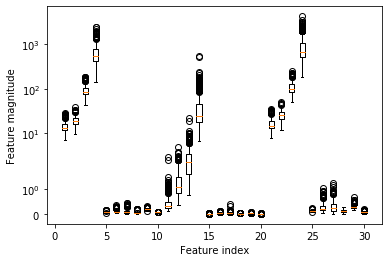

In [214]:
plt.boxplot(X, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

Scale the data

Exercise: Scale the training set using one of the methods above. Check to see what the scaled features look like by making box plots of the features. Do you see any issues or concerns with the way the data is scaled?

#### i. Scale the training set and then scale the test set in exactly the same way, 


Decide which approach you should use, and explain why you made this choice, and thenscale the test set.

In [215]:
"""
Pick a scaer to use:
    scaler=MinMaxScaler()     #MinMax Scaler
    scaler=StandardScaler()   #Standard Scaler
"""
#scaler=MinMaxScaler()   #Minimax Scaler
#scaler.fit(X)
#X_scaled = scaler.transform(X) 

'\nPick a scaer to use:\n    scaler=MinMaxScaler()     #MinMax Scaler\n    scaler=StandardScaler()   #Standard Scaler\n'

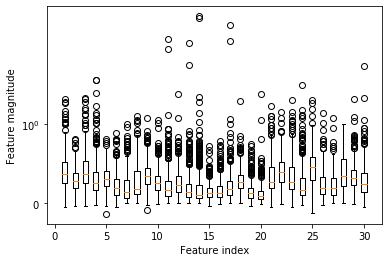

[[0.26619727 0.2359944  0.26118271 ... 0.31408935 0.39040917 0.13286795]
 [0.22550223 0.32002801 0.22706596 ... 0.06948454 0.44018765 0.07643979]
 [0.80104644 0.61379552 0.78866566 ... 0.55945017 0.25254105 0.08981966]
 ...
 [0.11026419 0.26610644 0.11220622 ... 0.17360825 0.22178786 0.26422339]
 [0.12860926 0.26260504 0.12083017 ... 0.         0.0797498  0.08074462]
 [0.24423487 0.46253501 0.2515163  ... 0.33171821 0.13265572 0.33356603]]


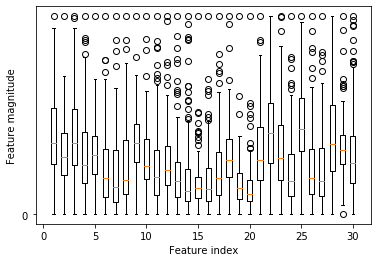

[[0.36632001 0.34313725 0.3853298  ... 0.704811   0.51654939 0.60791158]
 [0.3540469  0.5087535  0.34230478 ... 0.20635739 0.21918165 0.10738802]
 [0.4063691  0.17296919 0.39433283 ... 0.28233677 0.13891061 0.09831297]
 ...
 [0.29784898 0.05427171 0.29340409 ... 0.36769759 0.39275476 0.20093077]
 [0.3747174  0.00770308 0.37841168 ... 0.25453608 0.28850665 0.15427574]
 [0.76616498 0.26015406 0.78392722 ... 0.77216495 0.53166536 0.39069226]]


In [216]:
scaler.fit(X_train)
scaler.fit(X_test)
X_scaled = scaler.transform(X_train)
plt.boxplot(X_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()
print(X_scaled)

X_scaled = scaler.transform(X_test)
plt.boxplot(X_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()
print(X_scaled)


##### ii. Scale the training set and the test set independently so that they both have features in the range zero to one in the case of the MinMax scaler, or have zero mean and unit variance for the standardization scaler.

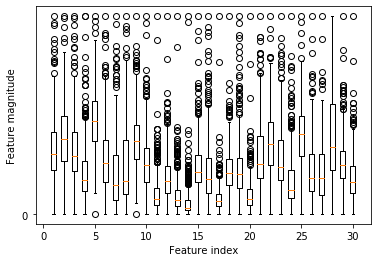

[[0.23044157 0.32157676 0.21940433 ... 0.31484671 0.30277942 0.09858323]
 [0.20062473 0.42116183 0.19452699 ... 0.06965208 0.34042973 0.06677161]
 [0.62232003 0.76929461 0.60403566 ... 0.56079917 0.19850187 0.07431457]
 ...
 [0.11619102 0.35726141 0.11077327 ... 0.17402687 0.17524147 0.17263545]
 [0.12963226 0.35311203 0.11706171 ... 0.         0.06780997 0.06919848]
 [0.21434995 0.59004149 0.21235575 ... 0.33251808 0.10782574 0.21172767]]


In [217]:
scaler=MinMaxScaler()   #Minimax Scaler independent train set
scaler.fit(X_train)
X_scaled1 = scaler.transform(X_train)
plt.boxplot(X_scaled1, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()
print(X_scaled1)

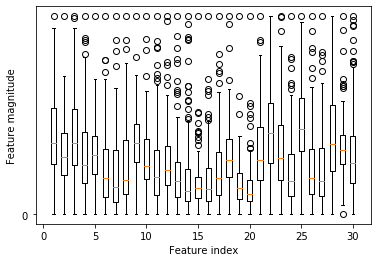

[[0.36632001 0.34313725 0.3853298  ... 0.704811   0.51654939 0.60791158]
 [0.3540469  0.5087535  0.34230478 ... 0.20635739 0.21918165 0.10738802]
 [0.4063691  0.17296919 0.39433283 ... 0.28233677 0.13891061 0.09831297]
 ...
 [0.29784898 0.05427171 0.29340409 ... 0.36769759 0.39275476 0.20093077]
 [0.3747174  0.00770308 0.37841168 ... 0.25453608 0.28850665 0.15427574]
 [0.76616498 0.26015406 0.78392722 ... 0.77216495 0.53166536 0.39069226]]


In [218]:
# for test set
scaler.fit(X_test)
X_scaled2 = scaler.transform(X_test)
plt.boxplot(X_scaled2, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()
print(X_scaled2)

### Ans: After scaling in both the ways, I found scaling independently is a better option as in case (i) there are points which are crossing the limit  (0,1). 

2e) What is the classification error on the training set, and what is the error on the test set? Do the results indicate that you are underfitting or overfitting the data? How do they compare to what you found for the unscaled data? What can you conclude about these experiments, and what statements can you make about how you would expect your classifier to perform on new data samples?

##### Ans: Classification error is 5% for training set and 4 percent for test set. The results were perfectly fine and  when compared to previous results without scaling. In the unscaled data the training set was over fitted and the values of error was very much high, in test set. But after scaling it seems normal . I believe my model will  generalized much better than before. 

In [219]:
scaler=MinMaxScaler()   #Minimax Scaler independent train set
scaler.fit(X_train)
X_scaled1 = scaler.transform(X_train)
X_scaled1.reshape(-1, 1)
clf_svc = SVC(C=1 , gamma= "auto")
clf_svc.fit(X_scaled1,y_train)
print("Accuracy on training set after scaling: {:,.2f}".format(clf_svc.score(X_scaled1,y_train)))


Accuracy on training set after scaling: 0.95


In [220]:
scaler=MinMaxScaler()   #Minimax Scaler independent train set
scaler.fit(X_test)
X_scaled2 = scaler.transform(X_test)
X_scaled2.reshape(-1, 1)
clf_svc = SVC(C=1 , gamma= "auto")
clf_svc.fit(X_scaled2,y_test)
print("Accuracy on training set after scaling: {:,.2f}".format(clf_svc.score(X_scaled2,y_test)))


Accuracy on training set after scaling: 0.96


2e) Exercise: Experiment with different values of gamma. Begin by setting gamma='scale' What do you and? Next, set the value of gamma manually and see if you can and the best value to use. What process should you use to determine the best value for C? Discuss your results. What can you say in terms of generalization error?

###### Ans: By using "Scale", the accuracy has increased. For large values of C, the  smaller-margin hyperpane is generated and the model is doing a better job. Conversely, a very small value of C  is creating a larger-margin separating hyperplane but yet accuracy is still around 93-96%. For very tiny values of C, The training data might have been selecting misclassified data, hence the accuracy is decreasing drastically to 80%-60%. The best way to choose C is by placing in this form  c=1/d. Where d=30.

In [164]:
scaler=MinMaxScaler()   #Minimax Scaler independent train set
scaler.fit(X_train)
X_scaled1 = scaler.transform(X_train)
X_scaled1.reshape(-1, 1)
clf_svc = SVC(C=0.03 , gamma= "scale")
clf_svc.fit(X_scaled1,y_train)
print("Accuracy on training set after scaling: {:,.2f}".format(clf_svc.score(X_scaled1,y_train)))


Accuracy on training set after scaling: 0.94


Exercise: Pick five features from the cancer data set and create a pairplot. Since the cancer data set has thirty featues, it is necessary to specify which features are to be used:

###### Ans :Pair plot for the mean perimeter,the mean smoothness, the mean symmetry, mean concave points and texture error.

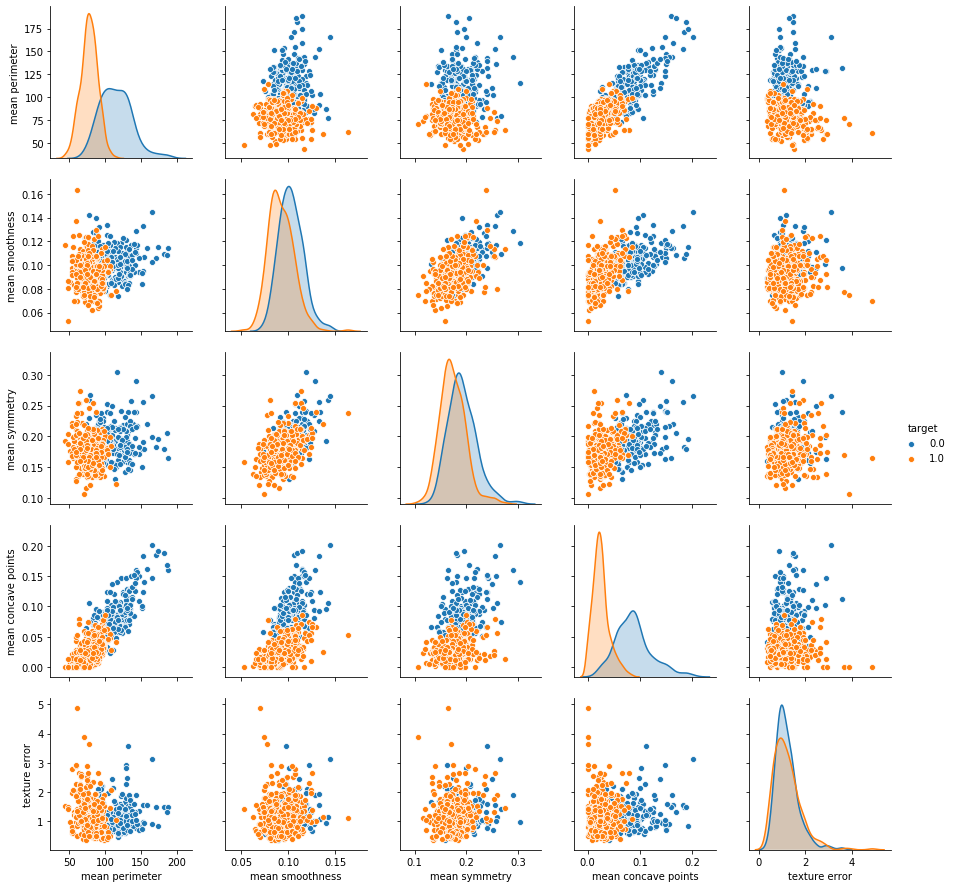

In [165]:
sns.pairplot(df_cancer,hue='target',vars=['mean perimeter', 'mean smoothness','mean symmetry', 'mean concave points','texture error'])

Exercise: Pick two features from your pair plots that you think (visually) will be the most effective in designing a classifier, and use them to design a linear soft-margin SVM classifier. What is the training error and the test error for your classifier, and how does it compare to a nonlinear soft-margin SVM that uses all thirty features? Discuss.

##### Ans: Linear soft margine is created with two best features. The errors of training set is 8% and test set is 6%. Where as in nonlinear SVm the train error is 5% and test error is 6%. I think non-linear classifier did a better performance than linear classifier. Its because of smaller dimensionality, non linear svm did a better job than linear svm. 

In [184]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape
X1_train,X1_test,y1_train,y1_test = train_test_split(X_new,y,random_state=0,test_size=0.25)
clf_svc = SVC(kernel='linear')
clf_svc.fit(X1_train,y1_train)
print("Accuracy on training set: {:,.2f}".format(clf_svc.score(X1_train,y1_train)))
print("Accuracy on test set: {:,.2f}".format(clf_svc.score(X1_test,y1_test)))
print(X_new.shape)

Accuracy on training set: 0.92
Accuracy on test set: 0.94
(569, 2)


Exercise: Project the cancer data set onto its first two principle components, and design a
two-dimensional linear soft margin SVM using these two principle components. What its
the training and test errors? How well does your classifier perform compared to previous
classifiers? What can you say about the generalization bound for this classifier? Which
one would you prefer to use?

###### Ans: Training and test error are 8% and 5% respectively. The test error is decreased comparitively form the above classifier by maintaining the same train error. The generalization bound imporves by decreasing the test error at same train error. And this classifier is better than previous SVM linear classifier. I recommand Principle component Analysis for feature selection.

Find the principal componente of the data stored in $X$, project this data onto the first two principal components, and print the vectors.

In [186]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X)
clf_svc = SVC(kernel='linear')
X1_train,X1_test,y1_train,y1_test = train_test_split(X_2d,y,random_state=0,test_size=0.25)
clf_svc.fit(X1_train,y1_train)
print("Accuracy on training set: {:,.2f}".format(clf_svc.score(X1_train,y1_train)))
print("Accuracy on test set: {:,.2f}".format(clf_svc.score(X1_test,y1_test)))
print(X_2d.shape)

Accuracy on training set: 0.92
Accuracy on test set: 0.95
(569, 2)


Exercise: Repeat the previous exercise using the first 10 and the first 5 principle components. Discuss what you find.

##### Ans: Increasing the number of features has improved the error of our training data. This can conclude any machine learning model generalizes better by considering the more number of important features. 


In [190]:
pca=PCA(n_components=5)
X_2d=pca.fit_transform(X)
clf_svc = SVC(kernel='linear')
X1_train,X1_test,y1_train,y1_test = train_test_split(X_2d,y,random_state=0,test_size=0.25)
clf_svc.fit(X1_train,y1_train)
print("Accuracy on training set: {:,.2f}".format(clf_svc.score(X1_train,y1_train)))
print("Accuracy on test set: {:,.2f}".format(clf_svc.score(X1_test,y1_test)))
print(X_2d.shape)

Accuracy on training set: 0.96
Accuracy on test set: 0.93
(569, 5)


In [191]:
pca=PCA(n_components=10)
X_2d=pca.fit_transform(X)
clf_svc = SVC(kernel='linear')
X1_train,X1_test,y1_train,y1_test = train_test_split(X_2d,y,random_state=0,test_size=0.25)
clf_svc.fit(X1_train,y1_train)
print("Accuracy on training set: {:,.2f}".format(clf_svc.score(X1_train,y1_train)))
print("Accuracy on test set: {:,.2f}".format(clf_svc.score(X1_test,y1_test)))
print(X_2d.shape)

Accuracy on training set: 0.97
Accuracy on test set: 0.93
(569, 10)


Exercise: Again using the first two principal components, design a nonlinear soft margin SVM using a Gaussian kernel. Discuss what you find.

######  Ans: Interesting! The errors has increased! I took a reference from this journal "Feature Selection for Nonlinear Kernel Support Vector Machines". It clearly explains "When Feature selection  is applied for nonlinearSVM classiﬁers, the resulting reduction is not in the number of input space features but in the number of kernel functions needed to generate the nonlinear classiﬁer--"  So definitely by decreasing the features, the probabillity of not classifing increases in higher z-spaces. Hence the errors might have increased.

In [226]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_2d,y,random_state=0,test_size=0.25)
scaler=MinMaxScaler()   #Minimax Scaler independent train set
scaler.fit(X_train)
X_scaled1 = scaler.transform(X_train)
X_scaled1.reshape(-1, 1)
clf_svc = SVC(C=1 , gamma= "auto")
clf_svc.fit(X_scaled1,y_train)
print("Accuracy on training set after scaling: {:,.2f}".format(clf_svc.score(X_scaled1,y_train)))
scaler=MinMaxScaler()   #Minimax Scaler independent train set
scaler.fit(X_test)
X_scaled2 = scaler.transform(X_test)
X_scaled2.reshape(-1, 1)
clf_svc = SVC(C=1 , gamma= "auto")
clf_svc.fit(X_scaled2,y_test)
print("Accuracy on training set after scaling: {:,.2f}".format(clf_svc.score(X_scaled2,y_test)))


Accuracy on training set after scaling: 0.87
Accuracy on training set after scaling: 0.88
